In [ ]:
# create a README.md file in Colab
readme_text = """
# Linear Regression Proof of Concept — Predicting Housing Prices

## Overview
This project demonstrates a simple linear regression model predicting housing prices using a synthetic dataset.
It covers:
- Data exploration
- Model training
- Evaluation metrics (MSE, R²)
- Visual checks (Actual vs. Predicted, Residual Plot)

## Dataset
The synthetic dataset contains the following features:
- **Rooms**: Number of rooms in the house
- **Area**: Square footage
- **Age**: House age in years
- **Distance_to_City**: Distance from city center (km)
- **Price**: Target variable

The dataset contains 200 rows and was generated with a linear relationship plus some random noise.

## Model
- **Algorithm**: Linear Regression (`scikit-learn`)
- **Data Split**: 80% training, 20% testing
- **Evaluation Metrics**:
  - Mean Squared Error (MSE): ~113,417,039
  - R² Score: ~0.995

## Results
- **Actual vs. Predicted Plot**: Shows nearly perfect alignment
- **Residual Plot**: Random scatter around zero (no systematic error)

## Next Steps
- Experiment with **polynomial regression** for non-linear relationships
- Compare with **Ridge** and **Lasso** regularization
- Apply the same workflow to a **real housing dataset**
- Add interactive visualizations for feature vs. target analysis

## How to Run
1. Clone the repo
2. Open `linear_regression_demo.ipynb` in Jupyter or Google Colab
3. Run the cells sequentially to reproduce results

"""
with open("README.md", "w") as f:
    f.write(readme_text)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/synthetic_housing_prices.csv")

In [ ]:
df

,Rooms,Area,Age,Distance_to_City,Price
0,5,2431,90,22.65,394046.03
1,6,2295,17,22.76,432303.24
2,4,1936,33,3.54,365745.39
3,6,2653,9,27.13,478846.96
4,6,2320,43,15.40,440153.62
...,...,...,...,...,...
195,4,2486,62,10.70,427467.69
196,3,3809,96,26.96,562929.04
197,5,954,37,14.48,231901.91
198,4,3337,12,20.19,551475.21


In [ ]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rooms             200 non-null    int64  
 1   Area              200 non-null    int64  
 2   Age               200 non-null    int64  
 3   Distance_to_City  200 non-null    float64
 4   Price             200 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 7.9 KB
None


In [ ]:
print("\nDescribe:")
display(df.describe().round(2))


Describe:


,Rooms,Area,Age,Distance_to_City,Price
count,200.00,200.00,200.00,200.00,200.00
mean,4.54,2421.10,50.08,16.05,418810.03
std,1.68,912.35,29.37,9.01,145995.61
min,2.00,801.00,1.00,0.82,109585.92
25%,3.00,1630.00,24.00,8.65,300392.58
50%,5.00,2472.50,50.50,16.51,428136.58
75%,6.00,3127.00,74.00,24.43,537599.20
max,7.00,3991.00,99.00,29.99,730416.71


In [ ]:
print("\nCorrelation with Price:")
print(df.corr()["Price"].sort_values(ascending=False).round(3))


Correlation with Price:
Price               1.000
Area                0.936
Rooms               0.259
Distance_to_City   -0.160
Age                -0.210
Name: Price, dtype: float64


In [ ]:
# separate features (X) and target (y)
X = df[["Rooms", "Area", "Age", "Distance_to_City"]]
y = df["Price"]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression — Plain Language Overview

## What it is
Linear regression is a **supervised learning** method used to predict a **numeric value** based on one or more input features.  
It finds the **best straight line** (or plane in multiple dimensions) that fits the data.

## How it works
1. **Input and output:** You have features (e.g., house size, number of rooms) and a target value (e.g., house price).  
2. **Fit a line:** The algorithm finds a line (or hyperplane) that **minimizes the difference** between the predicted values and the actual values.  
3. **Prediction:** For a new input, it uses the line’s equation to predict the target value.  

Mathematically:
- For one feature: `y = m*x + b`  
  - `x` = feature  
  - `y` = target  
  - `m` = slope  
  - `b` = intercept  

- For multiple features: `y = b + m1*x1 + m2*x2 + ... + mn*xn`  

## Evaluation
- **Mean Squared Error (MSE):** Average squared difference between predicted and actual values. Lower is better.  
- **R² Score:** Fraction of variance in the target that the model explains. Higher is better (max 1.0).

## Key Points
- Linear regression assumes a **linear relationship** between features and target.  
- It’s simple, interpretable, and often a **baseline** for regression tasks.  
- Works well when features are numeric and roughly linearly related to the target.


In [ ]:
# create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predict prices based on trained Linear Regression model
y_pred = model.predict(X_test)

In [ ]:
# evaluate model performance by comparing y_pred to y_test using MSE and R2 score which are both regression metrics
# MSE: measures how far off the predictions are on average (squared so the errors are larger and more noticeable), so the higher the MSE, the worse the prediction
# R2 (R-squared): shows how much of the variance in the target your model explains
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

# MSE finding explanation: take square root of result (113417039.02) to find the average error ($10,650) from model compared to y_test
# The model was off on avg by $10,650 for predicting the housing prices which isn't bad
import math
print(f"\nWhen predicting price, the model was off on average by: ${math.sqrt(mse):.2f}")

# R2 finding explanation: an R2 score of 1 would mean perfect prediction while 0 would mean the model is no better than just predicting the avg price
# The model scored an R2 of 99.5% of the variance explained, which is extremely well (synthetic dataset so makes sense)
print(f"When predicting price, the model explained {r2*100:.2f}% of the variance")

Mean Squared Error: 113417039.02
R² Score: 0.995

When predicting price, the model was off on average by: $10649.74
When predicting price, the model explained 99.51% of the variance


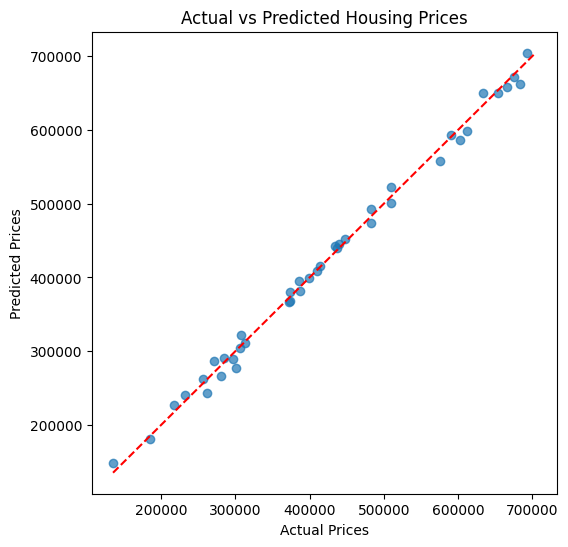

In [ ]:
# evaluate model performance with visual checks - plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")

# add a diagonal line for visual reference
line_start = min(y_test.min(), y_pred.min())
line_end = max(y_test.max(), y_pred.max())
plt.plot([line_start, line_end], [line_start, line_end], 'r--')
plt.show()

# visual findings explanation: if the data points hug the red line, the model is spot-on; if they scatter or curve away, then there's bias or non-linearity that the model did not capture

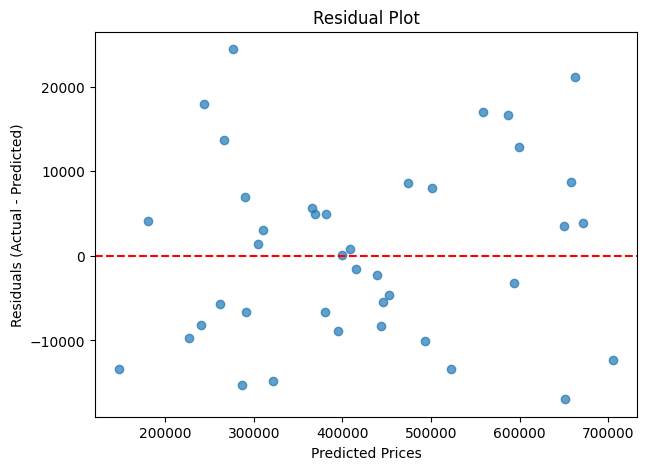

In [ ]:
# evaluate model performance with visual checks - residual plot
# a residual = actual - predicted
# in a good linaer model, residuals should be randomly scattered around 0 (no visible pattern)
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

# results: the model fits well since there is no clear pattern and the points are scattered
# if the plot had any curves, trends, or widening bands, the model might be missing a non-linear pattern